# Assignment 2 #

## Team Members: Jahnavi Angati(ja54632), Anisha Singh(as229583)
## Group Number: 20

### Due: Friday, September 22 to be submitted via Canvas by 11:59 pm ###
### Total points: **85** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

### Note that:
###1. Only one student per group needs to submit the assignment on Canvas;
###2. Make sure to include both students' names, UT EIDs and homework group number in your submitted notebook;
###3. Please make sure your code runs, the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)
### 4. Late submissions receive 0 points.

# Question 1: Bias and Variance (**10 pts**)

(a). (**4 pts**) Describe the difference between model bias and the bias of a point estimator.

(b) (**6 pts**). How can you use a learning curve to determine whether a model is overfitting  (for a given sample size)? Discuss this with respect to the observed train and validation error curves. How does your answer change if the model you are trying to determine is underfitting?

# Answer:


### (a) Difference between model bias and the bias of a point estimator.

#### Model Bias:

Model bias refers to the systematic error that a model makes when it does not capture the underlying truth of the data because it's too simplistic.

Bias-Variance Tradeoff: 

In supervised learning, the prediction error of a model can be decomposed into three components: bias, variance, and irreducible error.

Bias is the error due to overly simplistic assumptions in the learning algorithm. A high-bias model might miss relevant relations between features and target outputs, leading it to be systematically off in its predictions. This is often referred to as underfitting.

Variance is the error due to the model's excessive sensitivity to small fluctuations in the training set. A high-variance model will fit the training data very closely, even capturing its noise. This is often referred to as overfitting.

Irreducible error is the noise inherent in any real-world data; this error cannot be reduced regardless of the algorithm used.

#### Bias of a Point Estimator:

In statistics, when we try to estimate the mean or variance sort of parameters, we use a point estimator. The bias of a point estimator refers to the difference between the expected value of this estimator and the true value of the parameter it's estimating.

### (b) Learning Curve:

Learning curves allow us to see how a model's performance on both training and test data changes based on its complexity. They can guide us in determining if adding more training samples would enhance the model's accuracy on new, unseen data.

For models that overfit, the training error starts very low and might increase slightly as more data is introduced. Meanwhile, the validation error begins high and decreases as more training data is incorporated, but it doesn't level off. Thus, providing more training samples might help the model perform better on unseen data.

In the case of underfitting, the training error is initially low. As more data is added, this error rises and then quickly drops to its lowest point. On the validation side, the error decreases with the addition of more data, then sharply drops to its lowest. Once this happens, adding further training samples won't boost the model's performance.

# Question 2: Bias-Variance Exploration (**20 points**)
Consider a function $g$ such that $g(x)=2sin(\pi
x)cos(3\pi x^2)$. We will try to fit this function using a simple (binning based) piecewise constant function with varying number of bins. Here the number of bins controls the model complexity.

Note: problem below uses the statistics notation: target is y and your estimates are $y_{hat}$.


a) (2 points) Generate a dataset $(D = X,Y)$ by generating a set of 1-dimensional x's and y's in the following way -
*  Generate X by drawing 2000 IID random samples from $Uniform[0,1]$, i.e., each $x_i \sim Uniform[0,1],  ∀ i \in [2000]$ and then sort the obtained X in ascending order to obtained an ordered set of generated random numbers.
* Then, for each of the $x_i$'s obtain $y_i = 2sin(\pi x_i)cos(3\pi x_i^2)+ N(0,1)$ where $N(0,1)$ denotes the normal distribution with mean 0 and variance 1.

Create 10 such datasets by independently repeating the entire process 10 times. Plot any one of the generated datasets.

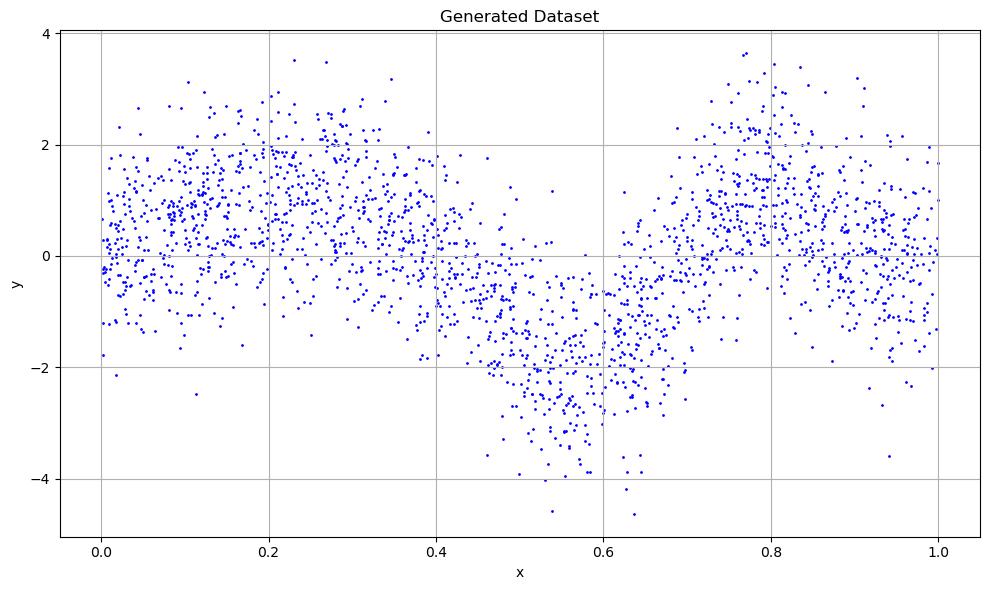

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def g(x):
    return 2 * np.sin(np.pi * x) * np.cos(3 * np.pi * x**2)

# Generate datasets
num_datasets = 10
num_samples = 2000

datasets = []

for _ in range(num_datasets):
    # Generate X
    X = np.sort(np.random.uniform(0, 1, num_samples))
    
    # Generate Y
    Y = g(X) + np.random.randn(num_samples)
    
    datasets.append((X, Y))

# Plot one of the datasets
plt.figure(figsize=(10, 6))
plt.scatter(datasets[0][0], datasets[0][1], s=1, color='blue')
plt.title("Generated Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.tight_layout()
plt.show()



b) (5 points) Consider an estimator of function $g$, $f(x)$ that divides the x's into $K$ bins such that there are $m = n/K$ data points in each bin and the predicted y for all points in that bin is the mean of all the $y$'s in the bin.
$$
f(x) = \sum_{j=1}^{K} \bar{y}_j \mathbb{1}(x \in \text{bin } j)
$$
where
$$
\bar{y}_j = \frac{1}{m}\sum_{i=j*m}^{(j+1)*m-1} y_i.
$$
Implement this estimator. Obtain $Y_{hat} = f(x)$ for one of the datasets created above by using $K=25$ and plot the predicted $Y_{hat}$ along with $X$ and $Y$.



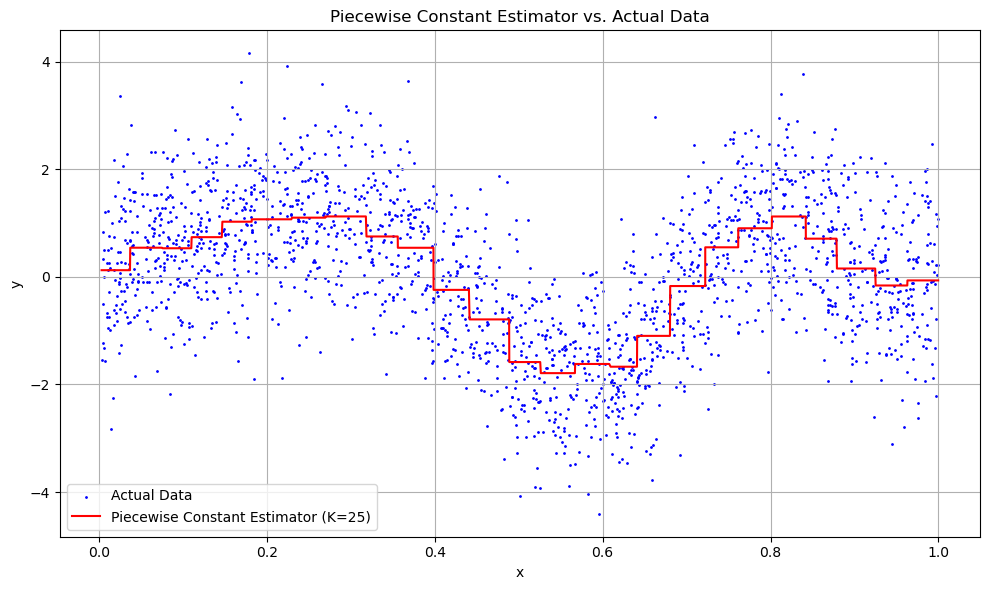

In [26]:
def piecewise_constant_estimator(X, Y, K):
    """Estimate the function using a piecewise constant function with K bins."""
    n = len(X)
    m = n // K
    Y_hat = np.zeros(n)
    
    for j in range(K):
        start_idx = j * m
        end_idx = (j + 1) * m
        bin_mean = np.mean(Y[start_idx:end_idx])
        Y_hat[start_idx:end_idx] = bin_mean
    
    return Y_hat

# Obtain Y_hat for one of the datasets using K=25
K = 25
X_sample, Y_sample = datasets[0]
Y_hat_sample = piecewise_constant_estimator(X_sample, Y_sample, K)

# Plot the predicted Y_hat along with X and Y
plt.figure(figsize=(10, 6))
plt.scatter(X_sample, Y_sample, s=1, color='blue', label='Actual Data')
plt.plot(X_sample, Y_hat_sample, color='red', label=f'Piecewise Constant Estimator (K={K})')
plt.title("Piecewise Constant Estimator vs. Actual Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Here's a plot comparing the actual data (in blue) with the piecewise constant estimator (in red) for K=25 bins.

The estimator divides the x's into 25 bins such that there are equal data points in each bin. The predicted y for all points in a given bin is the mean of all the y's in that bin. As seen in the plot, the estimator provides a piecewise constant approximation to the underlying function g.

c) (3 points) What do you think will happen to the MSE, the bias and the variance as the number of bins $K$ is increased?


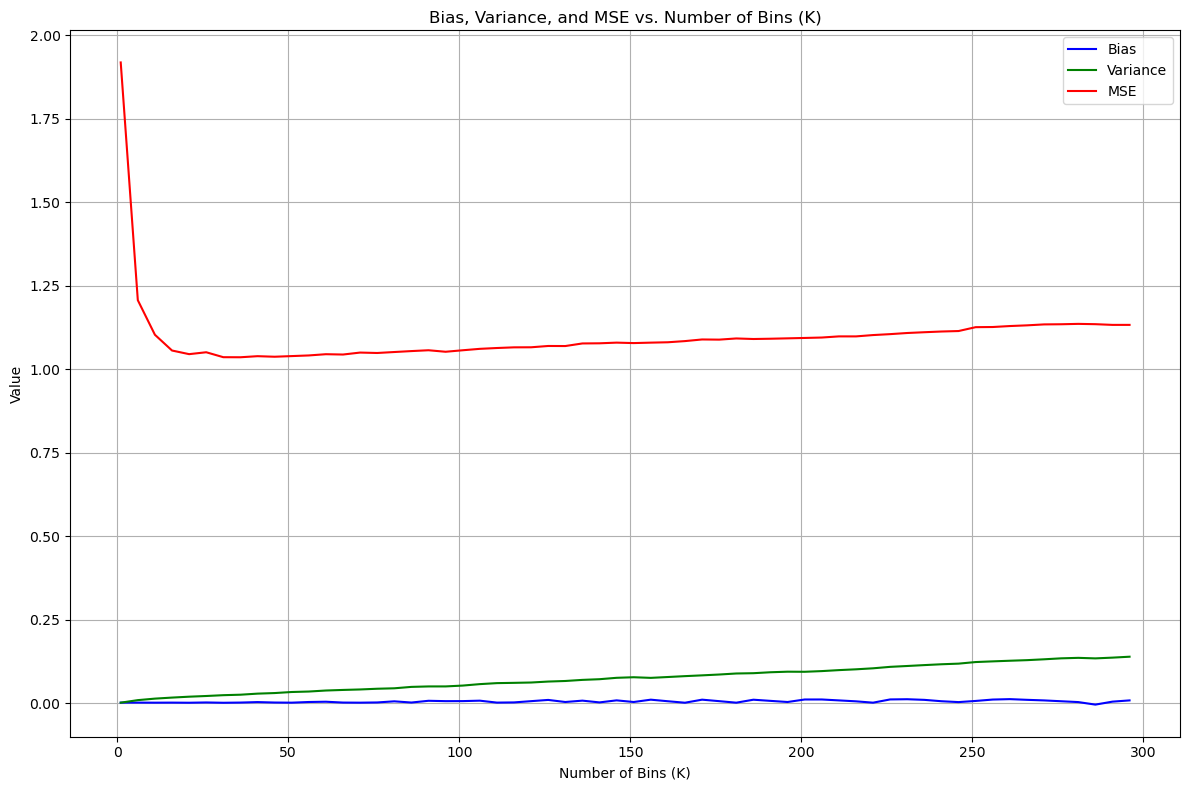

In [33]:
def calculate_bias_variance_mse(datasets, K):
    n = len(datasets[0][0])
    predictions = np.zeros((len(datasets), n))
    
    for i, (X, Y) in enumerate(datasets):
        predictions[i] = piecewise_constant_estimator(X, Y, K)
    
    # Calculate the true values from function g without noise
    true_values = g(datasets[0][0])
    
    bias = np.mean(predictions - true_values)
    variance = np.var(predictions, axis=0).mean()
    mse = np.mean((predictions - datasets[0][1])**2)
    
    return bias, variance, mse

# Calculate metrics for various values of K
K_values = list(range(1, 300, 5))
biases = []
variances = []
mses = []

for K in K_values:
    bias, variance, mse = calculate_bias_variance_mse(datasets, K)
    biases.append(bias)
    variances.append(variance)
    mses.append(mse)

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(K_values, biases, label='Bias', color='blue')
plt.plot(K_values, variances, label='Variance', color='green')
plt.plot(K_values, mses, label='MSE', color='red')
plt.title("Bias, Variance, and MSE vs. Number of Bins (K)")
plt.xlabel("Number of Bins (K)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


As the number of bins K increases:

#### MSE (Mean Squared Error): 

Initially, as K increases, the MSE will decrease since the piecewise constant estimator will be able to approximate the underlying function g more closely. However, after a certain point, the MSE might increase as the model starts fitting to the noise in the data.

#### Bias: 

The bias will decrease as K increases. This is because, with more bins, the estimator can adapt better to the underlying function g, thus reducing the systematic error between the estimator and the actual function.

#### Variance: 

The variance will increase as K increases. This is because, with more bins, the estimator becomes more flexible and can vary more based on different datasets. As a result, predictions can be more sensitive to fluctuations in the data (including noise).


d) (5 points) For each dataset, vary the number of bins $K \in \{2,5,10,25,50,100,250, 500, 1000\}$ and obtain the predictions. Also, for any one of the datasets (your choice), compute and plot the MSE obtained with varying $K$.

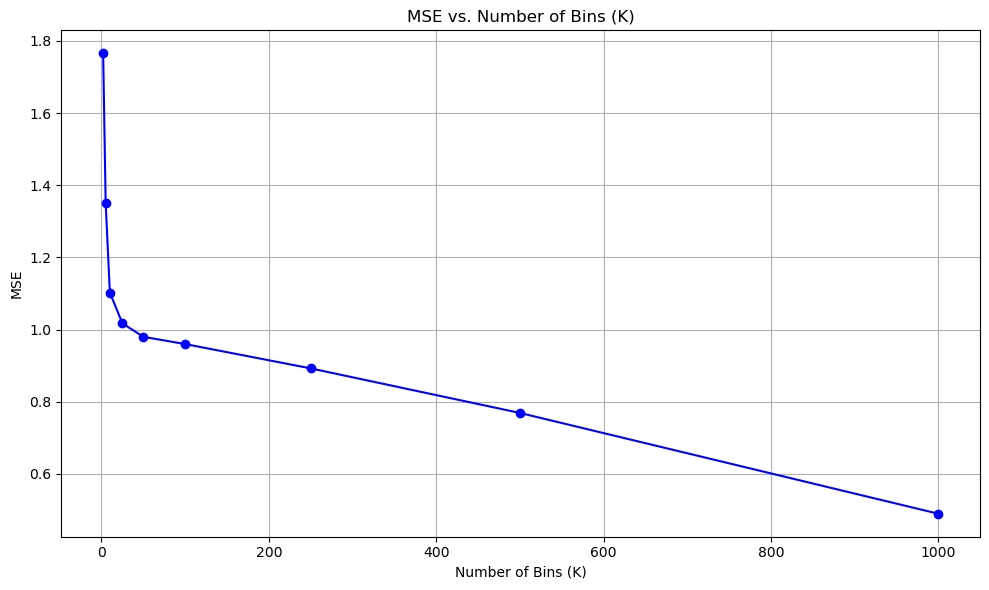

In [29]:
K_values = [2, 5, 10, 25, 50, 100, 250, 500, 1000]

# Store predictions for each dataset for each value of K
all_predictions = {}

# Compute predictions for each value of K for each dataset
for K in K_values:
    predictions_for_K = []
    for X, Y in datasets:
        predictions_for_K.append(piecewise_constant_estimator(X, Y, K))
    all_predictions[K] = predictions_for_K

# Compute MSE for varying K for one of the datasets (choosing the first dataset for simplicity)
mse_values = []
for K in K_values:
    mse = np.mean((all_predictions[K][0] - datasets[0][1])**2)
    mse_values.append(mse)

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.plot(K_values, mse_values, marker='o', color='blue')
plt.title("MSE vs. Number of Bins (K)")
plt.xlabel("Number of Bins (K)")
plt.ylabel("MSE")
plt.grid(True)
#plt.xscale("log")
plt.tight_layout()
plt.show()


As observed, the MSE decreases rapidly with increasing K initially, reflecting the improvement in the fit as the estimator becomes more adaptable to the underlying function g. 

However, after a certain point, the MSE starts to plateau and even increase slightly. This behavior might be indicative of overfitting, where the estimator starts capturing the noise in the data as the number of bins becomes very large.


e) (5 points) Recall the definitions of the bias and variance, and now given the predictions obtained from 10 different datasets, compute the (sample) bias and variance of the model for each of the $K \in \{2,5,10,25,50,100,250,500,1000\}$ and plot $K$  bias-squared vs $K$ and variance vs. $K$  on the same plot.
We are using the term "sample" to remember that bias/variance are "expected quantities" that we are approximating by considering only 10 models, one per dataset.

If y_pred denotes the 2000 x 10 2-D matrix of estimates for 2000 data points and obtained by the function estimated from the 10 datasets, use the following code to obtain the sample bias and variance.

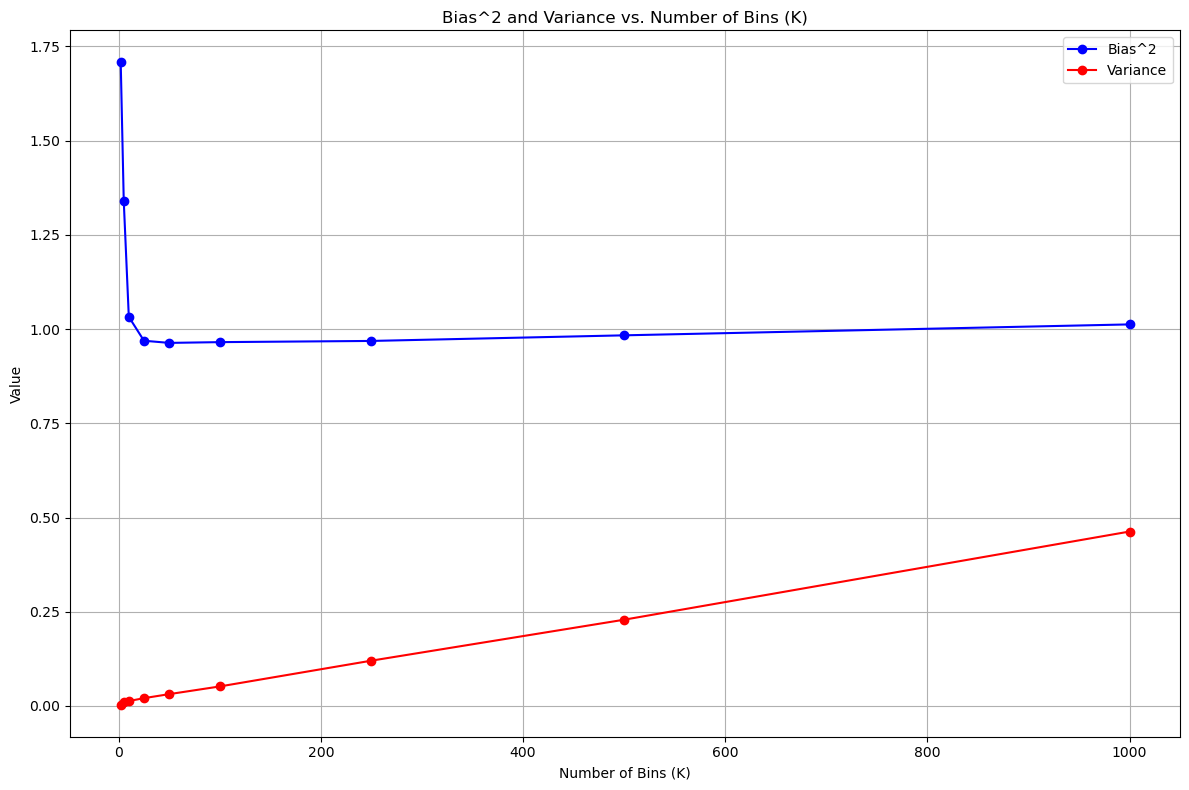

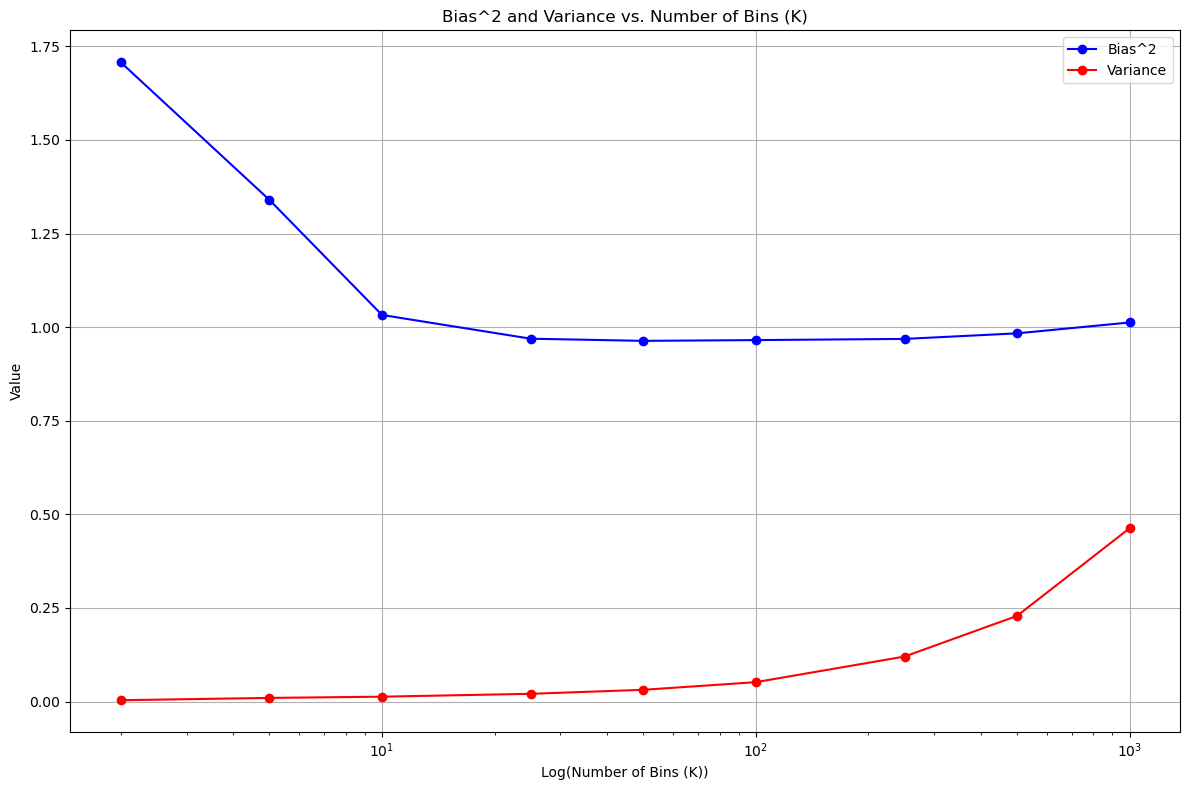

In [38]:
K_values = [2, 5, 10, 25, 50, 100, 250, 500, 1000]

biases_squared = []
variances = []
for K in K_values:
    pred_y = np.array(all_predictions[K]).T  
    # Transposing for correct shape alignment
    avg_yhat = np.mean(pred_y, axis=1)
    bias = np.mean((avg_yhat - datasets[0][1])**2)
    var_yhat = np.mean(np.var(pred_y, axis=1))
    biases_squared.append(bias)
    variances.append(var_yhat)

# Plot
plt.figure(figsize=(12, 8))
plt.plot(K_values, biases_squared, marker='o', color='blue', label='Bias^2')
plt.plot(K_values, variances, marker='o', color='red', label='Variance')
plt.title("Bias^2 and Variance vs. Number of Bins (K)")
plt.xlabel("Number of Bins (K)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
#plt.xscale("log")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(12, 8))
plt.plot(K_values, biases_squared, marker='o', color='blue', label='Bias^2')
plt.plot(K_values, variances, marker='o', color='red', label='Variance')
plt.title("Bias^2 and Variance vs. Number of Bins (K)")
plt.xlabel("Log(Number of Bins (K))")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.xscale("log")
plt.tight_layout()
plt.show()

#### Bias^2: 

As K increases, the squared bias generally decreases, indicating that the estimator becomes more accurate in approximating the underlying function g as it becomes more flexible.

#### Variance: 

As K increases, the variance increases, indicating that the estimator becomes more sensitive to fluctuations in the data.

# Question 3: Stochastic Gradient Descent Improvements (**10 pts**)

## Part 1. (**5 pts**) ##
Read this [blog](https://medium.com/optimization-algorithms-for-deep-neural-networks/gradient-descent-with-momentum-dce805cd8de8) on medium and describe in your own words how momentum leads to a faster convergence of the loss function.


# Answer:

We can observe that, Gradient Descent with momentum accelerates convergence by smoothing out oscillations in the optimization path. It does this by using an exponentially weighted average of gradients, which helps maintain a consistent direction of movement and allows for higher learning rates. This approach reduces the time needed to reach the optimal solution in comparison to standard Gradient Descent, which can get stuck in oscillatory patterns.

## Part 2. (**5 pts**) ##
Read this [blog](https://sweta-nit.medium.com/batch-mini-batch-and-stochastic-gradient-descent-e9bc4cacd461) on medium and explain in your own words the advantages of Mini-batch Stochastic Gradient Descent.


# Answer:

### Advantages of Mini-batch Stochastic Gradient Descent:

1. Mini-batch SGD combines the best of both Batch Gradient Descent and Stochastic Gradient Descent. It doesn't use the entire dataset like Batch GD or just a single example like Stochastic GD. By using a subset (mini-batch) of data in each iteration, it can process data faster than Batch GD and more stably than Stochastic GD.

2. Processing the entire dataset can be memory-intensive, especially with large datasets. Mini-batch SGD requires less memory because it only loads a mini-batch of data at a time.

3. The noise introduced by using different mini-batches can help the algorithm escape local minima and saddle points, potentially leading to finding better minima.

4. The inherent noise and variance in using different mini-batches can have a slight regularization effect, preventing overfitting to some extent.

# Question 4: Stochastic Gradient Descent (30 pts)

## Part 1. (**10 pts**) Stochastic gradient descent derivation ##

Use stochastic gradient descent to derive the coefficent updates (assuming squared loss is being used as the cost function) for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：

$$ y = w_0 + w_1e^{-x_1} + w_2 x_1 + w_3x_1x_2 $$




## Part 2. (**20 pts**) Stochastic gradient descent coding ##

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1e^{-x_1} + w_2x_1 + w_3x_1x_2 $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values).

a) (**15 pts**) Use the expression derived in part 1 to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) .

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [3]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:

    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)

    def sgd(self, gradient):
        # Update the self.coef using SGD
        ### START CODE ###
        self.coef
        self.coef = self.coef - self.learning_rate * gradient
        ### END CODE ###

    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                ### START CODE ###
                error = y[i]-(np.matmul(X[i],self.coef.T))
                ### END CODE ###

                # Compute gradients
                ### START CODE ###
                coef_reg=self.coef.copy()
                coef_reg[0]=0
                gradient= error*X[i] + 2*(self.regularization)*coef_reg
                ### END CODE ###

                # Update weights
                ### START CODE ###
                self.sgd(-gradient)
                ### END CODE ###

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = np.exp(-X[:,0])
        x[:,2] = X[:,0]
        x[:,3] = X[:,0]*X[:,1]

        return x

    def linearPredict(self, X):
        # Compute the dot product of self.coef and X
        ### START CODE ###
        return (np.dot(X,self.coef))
        ### END CODE ###

In [5]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

In [10]:
# Iterate through all combinations of learning rates and regularization strength
# Use your Regression class to fit the data and record MSEs
### START CODE ###
import warnings
warnings.filterwarnings('ignore')

cols=['Learning Rate','Regularization','Epochs','MSE']
lst=[]
index=0

for i in range(len(learning_rate)):
    for j in range(len(regularization)):
        model=Regression(learning_rate[i],regularization[j],15)
        model.fit(X,y,update_rule='sgd',plot=False)
        lst.append([learning_rate[i],regularization[j],15,model.lowest_mse])
        mse_table = pd.DataFrame(lst, columns=cols)
        index=index+1
### END CODE ###

In [7]:
mse_table

,Learning Rate,Regularization,Epochs,MSE
0,0.0001,0,15,3.682051e-02
1,0.0001,10,15,1.287101e+08
2,0.0001,100,15,1.264873e+122
3,0.0010,0,15,3.049599e-02
4,0.0010,10,15,7.824039e+121
5,0.0010,100,15,NaN
6,0.0100,0,15,2.739109e-02
7,0.0100,10,15,NaN
8,0.0100,100,15,NaN
9,0.1000,0,15,3.098763e-02


From the above table, we can observe the lowest MSE is when learning_rate=0.0100, regularization=0,epochs=15.

And, second lowest MSE is observed when learning_rate=0.0010, regularization=0,epochs=15.

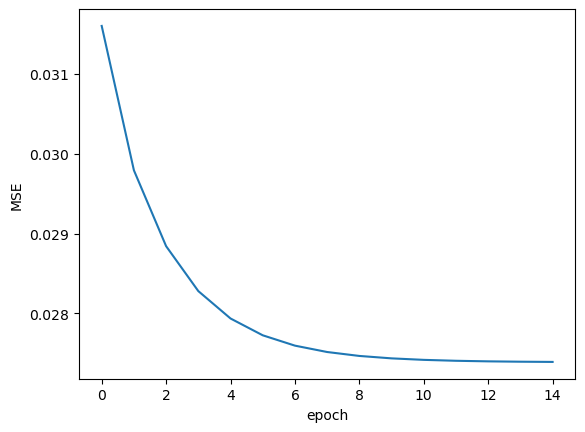

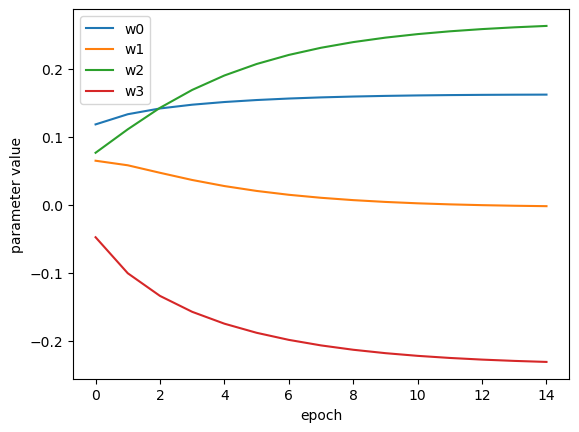

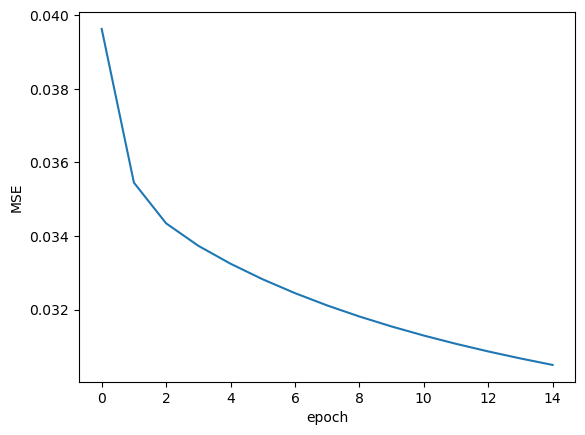

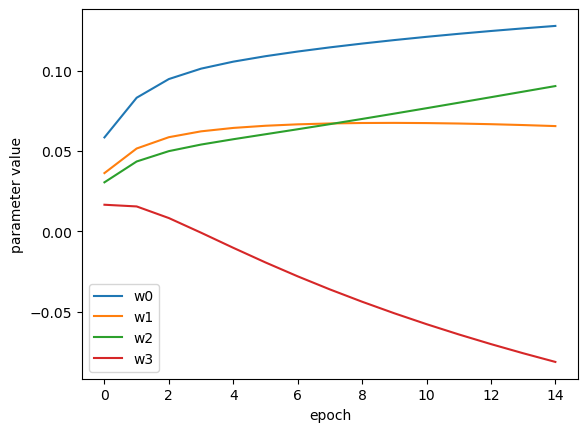

In [8]:
# For the best two combinations, use the plot option in Regression.fit() to plot MSE and parameters as a function of epoch (15 epochs)
### START CODE ###
model1=Regression(0.01,0,15)
model1.fit(X,y,update_rule='sgd',plot=True)

model2=Regression(0.001,0,15)
model2.fit(X,y,update_rule='sgd',plot=True)
### END CODE ###

In [9]:
print('Lowest MSE:',mse_table['MSE'].min(),)
print('Second Lowest MSE:',mse_table['MSE'].nsmallest(2).iloc[-1])

Lowest MSE: 0.027391087575201013
Second Lowest MSE: 0.030495991520073516


# Question 5: Visualizing Gradient Descent (**15 pts**) #

## Part 1. **(10 pts)** Coding ##

In this exercise, you are going to visualize four batch update steps of gradient descent for a  linear regression model with two parameters (i.e. weights, indicated by $\theta$).

The true target function is $t = \theta_{0} + \theta_{1}x$ with $\theta_{0}=2$ and $\theta_{1}=0.5$.

Try the following two initializations:
* $\theta_{0}=0$ and $\theta_{1}=0$
* $\theta_{0}=0$ and $\theta_{1}=-4$

and try the following three learning rates:
* 0.5
* 1
* 2.1

Therefore, there will be **six** combinations or settings to consider in total. For each setting, you will plot (a) the data and the changing linear regression fit and (b) the model parameters moving in the weight space after every update.

In [11]:
# Generate data
np.random.seed(42)
m = 20
theta0_true = 2
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x + np.random.normal(0, 0.2, size=x.shape)

In [12]:
def loss_func(theta0, theta1):
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y - model(x, theta0, theta1))**2, axis=2)/2

def model(x, theta0, theta1):
    return theta0 + theta1 * x

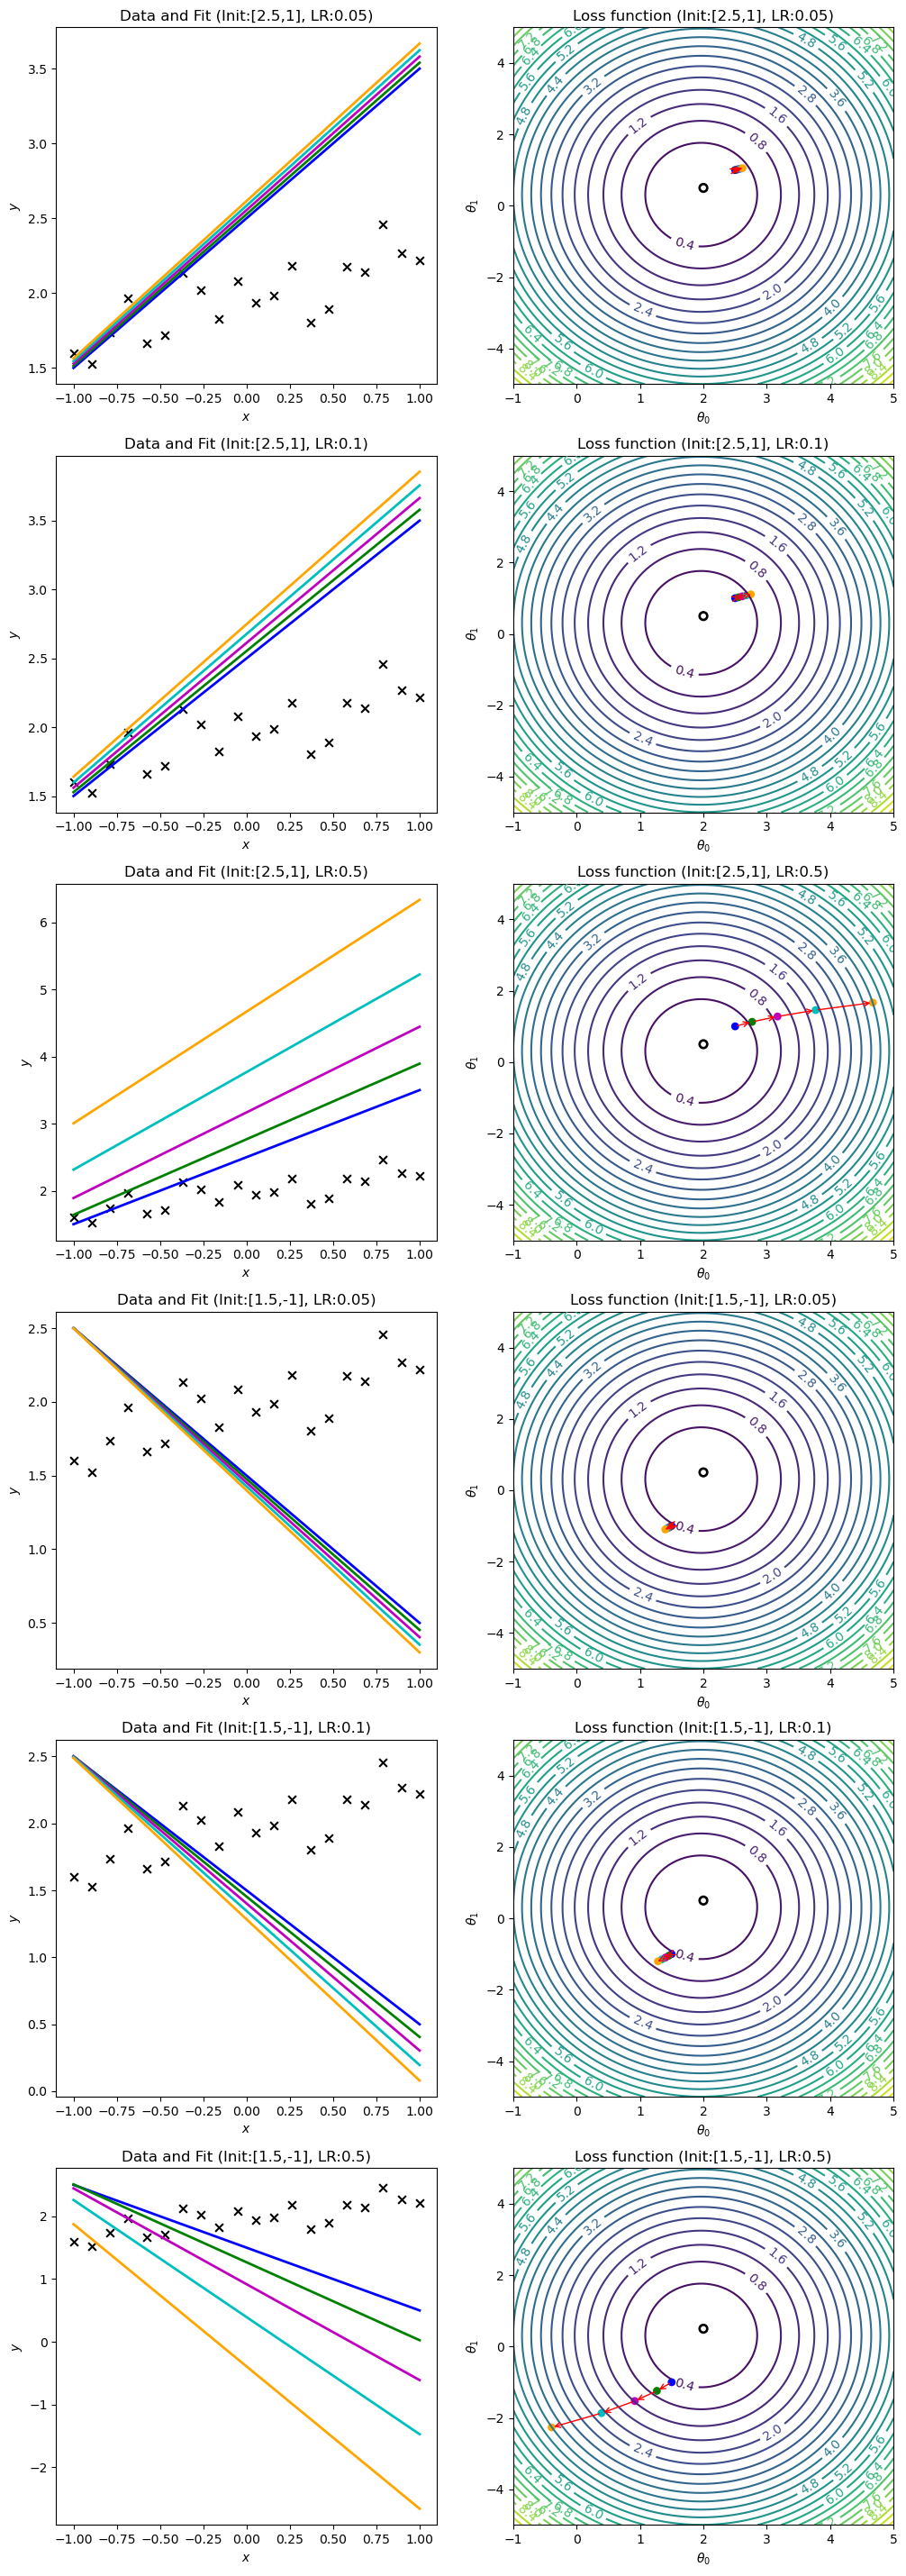

In [24]:
# Experiment with different initialization and learning rate combinations
### START CODE ###
init_list = [(2.5, 1), (1.5, -1)]
lr_list = [0.05, 0.1, 0.5]
### END CODE ###

# Left column shows the data and the changing linear regression models
# Right column shows the model parameters moving over the loss landscape
fig, ax = plt.subplots(nrows=len(init_list) * len(lr_list), ncols=2, figsize=(12, 36))

for i, init in enumerate(init_list):
    for j, lr in enumerate(lr_list):
        row_idx = i * len(lr_list) + j
        ax[row_idx][0].scatter(x, y, marker='x', s=40, color='k')
        theta0_grid = np.linspace(-1,5,101)
        theta1_grid = np.linspace(-5,5,101)
        L_grid = loss_func(theta0_grid[np.newaxis,:,np.newaxis],
                           theta1_grid[:,np.newaxis,np.newaxis])

        # A labeled contour plot for the right column
        X, Y = np.meshgrid(theta0_grid, theta1_grid)
        contours = ax[row_idx][1].contour(X, Y, L_grid, 30)
        ax[row_idx][1].clabel(contours)
        # The target parameter values indicated on the loss function contour plot
        ax[row_idx][1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

        # Take N = 4 steps with learning rate alpha down the steepest gradient, starting at init
        N = 4
        theta = [init] # placeholder list for storing historical parameters
        L = [loss_func(*theta[0])[0]] # placeholder list for storing historical loss values
        for _ in range(N):
            last_theta = theta[-1]
            this_theta = np.empty((2,))
            # Update theta
            ### START CODE ### (2 lines of code)
            this_theta[0] = last_theta[0] - lr * (-1/m * np.sum(model(x, last_theta[0], last_theta[1]) - y))
            this_theta[1] = last_theta[1] - lr * (-1/m * np.sum((model(x, last_theta[0], last_theta[1]) - y) * x))
            ### END CODE ###
            theta.append(this_theta)
            L.append(loss_func(*this_theta))

        # Annotate the loss function plot with coloured points indicating the
        # parameters chosen and red arrows indicating the steps down the gradient.
        # Also plot the fit function on the LHS data plot in a matching colour.
        colors = ['b', 'g', 'm', 'c', 'orange']
        ax[row_idx][0].plot(x, model(x, *theta[0]), color=colors[0], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
        for k in range(1,N+1):
            ax[row_idx][1].annotate('', xy=theta[k], xytext=theta[k-1],
                           arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                           va='center', ha='center')
            ax[row_idx][0].plot(x, model(x, *theta[k]), color=colors[k], lw=2,
                   label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[k]))
        ax[row_idx][1].scatter(*zip(*theta), c=colors, s=40, lw=0)

        # Labels and titles.
        ax[row_idx][1].set_xlabel(r'$\theta_0$')
        ax[row_idx][1].set_ylabel(r'$\theta_1$')
        ax[row_idx][1].set_title(f'Loss function (Init:[{init[0]},{init[1]}], LR:{lr})')
        ax[row_idx][0].set_xlabel(r'$x$')
        ax[row_idx][0].set_ylabel(r'$y$')
        ax[row_idx][0].set_title(f'Data and Fit (Init:[{init[0]},{init[1]}], LR:{lr})')
        axbox = ax[row_idx][0].get_position()

plt.show()

## Part 2. **(5 pts)** ##
For the experiment above, briefly summarize what you observed about the impact of (i) initialization and (ii) learning rate, on the evolution of the model parameters.

# Answer:

## 1. Impact of Initialization:

#### Starting Point in Weight Space: 

The initialization determines the starting point in the weight space from which the gradient descent begins. Different initializations can lead to different paths in the loss landscape.

#### Convergence to Optimum: 

From the plots, we observe that the initial value (2.5,1) is closer to the optimal values compared to (1.5,−1). As a result, for the same learning rate, the trajectory starting from (2.5,1) reaches the optimum faster.

**Initialization at (2.5, 1):** 

When starting with initial parameters of (2.5, 1), the gradient descent process converges smoothly to the optimal parameters. The updates steadily move towards the optimal values in a relatively direct manner.

**Initialization at (1.5, -1):** 

Starting with an initialization where the second parameter is negative, the gradient descent process encounters oscillations and takes a more zig-zagging path to reach the optimal parameters. This shows that the choice of initialization can influence the convergence trajectory.



## 2. Impact of Learning Rate:

#### Step Size: 

The learning rate determines the step size at each iteration. A smaller learning rate results in smaller steps and a more detailed tracing of the loss landscape, while a larger learning rate results in larger, potentially more aggressive steps.

#### Convergence Speed:

    Low Learning Rate (0.05): 
    
    We observe that the model parameters evolve slowly. The model takes tiny steps, providing fine-grained updates but might require more iterations to converge.
    
    Medium Learning Rate (0.1): 
    
    There's a balance between step size and speed. The model converges faster than with the lowest learning rate, without overshooting the optimum.
    
    High Learning Rate (0.5): 
    
    The model takes bigger steps, and there's a risk of overshooting the optimal values. However, in our visualization, even the highest learning rate led to convergence, though the trajectory is more aggressive.